In [26]:
import gdown

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # Кодирование категориальных данных

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # Масштабирование данных

from sklearn.feature_selection import SelectKBest # Выбор признаков с наивысшими оценками
from sklearn.feature_selection import chi2 # Выбор признаков по Хи квадрат

from sklearn.model_selection import train_test_split # Деление выборки на тестовые и тренировочные данные
from sklearn.model_selection import cross_val_score # Оценка качества работы модели

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Критерий качества, точности

from sklearn.neighbors import KNeighborsClassifier # Обучение модели K-ближайших соседей
from sklearn.linear_model import LinearRegression # Линейная регрессия

from sklearn.tree import DecisionTreeClassifier # Деревья решений
from sklearn.ensemble import RandomForestClassifier # Ансамбли деревьев решений
from sklearn.ensemble import GradientBoostingClassifier # Ансамбли градиентного спуска

In [27]:
# Скачивание данных из Google Disk
# gdown.download(id='1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')

# Загрузка файла из Git репозитория в Pandas
# dataset = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/lesson12/diabetes.csv', sep=',')

# Загрузка данных из локального хранилища
dataset = pd.read_csv(r"diabetes.csv", sep=',')

# Первые ячейки
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Размер данных (количество строк, колонок)
dataset.shape

(768, 9)

In [29]:
# Заголовки столбцов в нижнем регистре
dataset.columns = [col.lower() for col in dataset.columns]
dataset.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [30]:
# Проверка пропущенных значений
dataset.isnull().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [31]:
# Количество неопределенные значений (неправильно считанные)
dataset.isna().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [32]:
# Проверка значений на 0
(dataset == 0).sum()

pregnancies                 111
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

In [33]:
# Заполнение нулевых значений - медианой
dataset = dataset.replace(0, dataset.median())
dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [34]:
# Проверка значений на 0
(dataset == 0).sum()

pregnancies                   0
glucose                       0
bloodpressure                 0
skinthickness                 0
insulin                       0
bmi                           0
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

In [35]:
# Описательная статистика
dataset.describe(include='all', percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
pregnancies,768.0,4.278646,3.021516,1.000,1.000,2.00000,3.0000,6.00000,9.0000,17.00
glucose,768.0,121.656250,30.438286,44.000,86.700,99.75000,117.0000,140.25000,167.0000,199.00
bloodpressure,768.0,72.386719,12.096642,24.000,58.000,64.00000,72.0000,80.00000,88.0000,122.00
skinthickness,768.0,27.334635,9.229014,7.000,18.000,23.00000,23.0000,32.00000,40.0000,99.00
insulin,768.0,94.652344,105.547598,14.000,30.500,30.50000,31.2500,127.25000,210.0000,846.00
bmi,768.0,32.450911,6.875366,18.200,24.000,27.50000,32.0000,36.60000,41.5000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,2.42
age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00


In [36]:
# Просмотр типов данных в датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    float64
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [37]:
# Разделение для задачи классификации на X (data features) и y (outcome)
X = dataset.drop(columns=['outcome'])
y = dataset['outcome']

In [38]:
# Построить распределение для всех числовых переменных
figure = px.box(X)
figure.show()

In [39]:
# Подготовка данных
# Нормализация (StandardScaler)
scalar = StandardScaler()
features = scalar.fit_transform(X, y)
features

array([[ 0.57007018,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23242101,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477, -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [40]:
# Массив в Pandas
X_normalised = pd.DataFrame(features, columns=X.columns)
X_normalised

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.570070,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-1.085807,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.232421,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-1.085807,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-0.423456,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.894772,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.754631,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.238895,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-1.085807,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732


In [41]:
# Построить распределение для всех числовых нормализированных переменных
figure = px.box(X_normalised)
figure.show()

In [42]:
# Разделение на тренировочную и тестовую (25%) для классификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=512, shuffle=True)

In [43]:
# Укажите score модели (метрики) и постройте визуализацию обученной классификации для указанных k

def model_report(model, X_test, y_test, average='weighted'):
    # Проведите тестирование модели
    # Делаем предсказания на тестовом наборе
    y_pred = model.predict(X_test)

    # Оцениваем точность модели
    accuracy_eff = accuracy_score(y_test, y_pred)
    print(f"Правильность (accuracy) модели: {accuracy_eff}")

    precision_eff = precision_score(y_test, y_pred, average=average)
    print(f"Точность (precision) модели: {precision_eff}")

    recall_eff = recall_score(y_test, y_pred, average=average)
    print(f"Полнота (recall) модели: {recall_eff}")

    f1_eff = f1_score(y_test, y_pred, average=average)
    print(f"F1 мера модели: {f1_eff}")
    
    # # Построение графика решающих областей 2D для бинарной классификации
    # x_min, x_max = X_test.to_numpy()[:, 0].min() - 1, X_test.to_numpy()[:, 0].max() + 1
    # y_min, y_max = X_test.to_numpy()[:, 1].min() - 1, X_test.to_numpy()[:, 1].max() + 1
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

    # # Предсказание значений на сетке
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)

    # # Построение контуров
    # plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Разметка классов
    for i, c in zip(range(2), 's^o'):
        plt.scatter(X_test.to_numpy()[y_test.to_numpy() == i][:, 0], X_test.to_numpy()[y_test.to_numpy() == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f'Результат классификации ({type(model).__name__})')
    plt.legend()
    plt.show()

In [44]:
# Загрузить классификатор модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn = KNeighborsClassifier()

Правильность на обучающем наборе: 0.800
Правильность на тестовом наборе: 0.688
Правильность (accuracy) модели: 0.8003472222222222
Точность (precision) модели: 0.798472498618021
Полнота (recall) модели: 0.8003472222222222
F1 мера модели: 0.7989809759163293


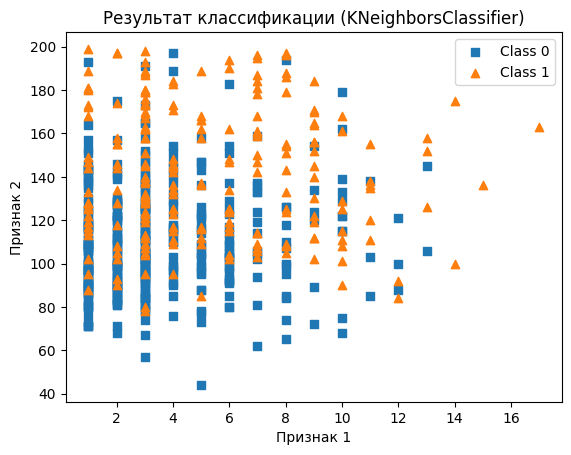

In [45]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn.set_params(n_neighbors=5)
model_knn.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn.score(X_test, y_test)))
model_report(model_knn, X_train, y_train)

In [46]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25
score_best = 0
best_n_neighbors = 0

for k in np.arange(5, 26, 5):
  model_knn.set_params(n_neighbors=k)
  scores = cross_val_score(model_knn, X_train, y_train)
  print(f"k: {k}, по scores - {scores}")
  score_avg = np.mean(scores)
  if score_avg > score_best:
    score_best = score_avg
    best_n_neighbors = k

print(f"Лучший k по scores - {best_n_neighbors}")

k: 5, по scores - [0.71551724 0.73043478 0.73043478 0.73913043 0.73043478]
k: 10, по scores - [0.69827586 0.75652174 0.76521739 0.73043478 0.67826087]
k: 15, по scores - [0.6637931  0.74782609 0.74782609 0.69565217 0.65217391]
k: 20, по scores - [0.63793103 0.70434783 0.72173913 0.73913043 0.67826087]
k: 25, по scores - [0.65517241 0.73913043 0.72173913 0.69565217 0.63478261]
Лучший k по scores - 5


Правильность на обучающем наборе: 0.780
Правильность на тестовом наборе: 0.750
Правильность (accuracy) модели: 0.7795138888888888
Точность (precision) модели: 0.7768808308294902
Полнота (recall) модели: 0.7795138888888888
F1 мера модели: 0.7774831500580636


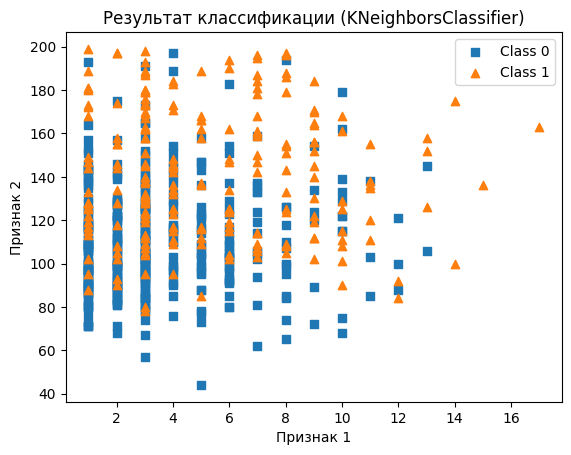

In [47]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn.set_params(n_neighbors=15)
model_knn.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn.score(X_test, y_test)))
model_report(model_knn, X_train, y_train)

In [48]:
# Выбор 2 лучших признаков по Хи квадрат
selector = SelectKBest(chi2, k=2)

X_train_best = selector.fit_transform(X_train, y_train)
X_train_best_df = pd.DataFrame(X_train_best)
X_train_best_df

X_test_best = selector.fit_transform(X_test, y_test)
X_test_best_df = pd.DataFrame(X_test_best)
X_test_best_df

,0,1
0,87.0,30.5
1,89.0,85.0
2,158.0,30.5
3,173.0,185.0
4,111.0,30.5
...,...,...
187,179.0,30.5
188,171.0,135.0
189,148.0,30.5
190,84.0,115.0


Правильность на обучающем наборе: 0.747
Правильность на тестовом наборе: 0.729
Правильность (accuracy) модели: 0.7465277777777778
Точность (precision) модели: 0.7418023821847579
Полнота (recall) модели: 0.7465277777777778
F1 мера модели: 0.7420173554184123


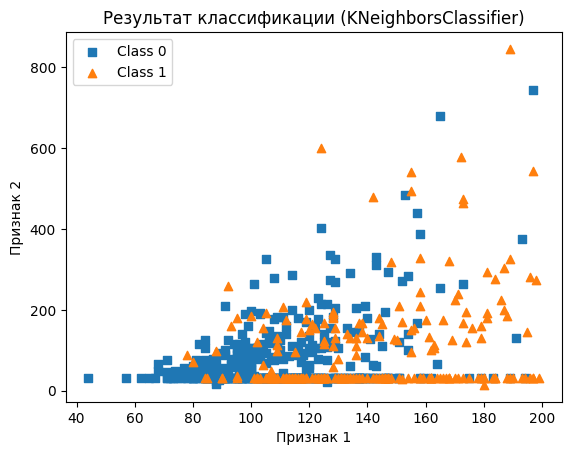

In [49]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn.set_params(n_neighbors=15)
model_knn.fit(X_train_best_df, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn.score(X_train_best_df, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn.score(X_test_best_df, y_test)))
model_report(model_knn, X_train_best_df, y_train)

In [50]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25
score_best = 0
best_n_neighbors = 0

for k in np.arange(5, 26, 5):
  model_knn.set_params(n_neighbors=k)
  scores = cross_val_score(model_knn, X_train_best_df, y_train)
  print(f"k: {k}, по scores - {scores}")
  score_avg = np.mean(scores)
  if score_avg > score_best:
    score_best = score_avg
    best_n_neighbors = k

print(f"Лучший k по scores - {best_n_neighbors}")

k: 5, по scores - [0.65517241 0.7826087  0.7826087  0.70434783 0.68695652]
k: 10, по scores - [0.67241379 0.75652174 0.79130435 0.73913043 0.66086957]
k: 15, по scores - [0.64655172 0.74782609 0.7826087  0.73043478 0.63478261]
k: 20, по scores - [0.64655172 0.74782609 0.71304348 0.71304348 0.66086957]
k: 25, по scores - [0.65517241 0.73043478 0.73043478 0.70434783 0.62608696]
Лучший k по scores - 10


Правильность на обучающем наборе: 0.780
Правильность на тестовом наборе: 0.667
Правильность (accuracy) модели: 0.7795138888888888
Точность (precision) модели: 0.7768808308294902
Полнота (recall) модели: 0.7795138888888888
F1 мера модели: 0.7774831500580636


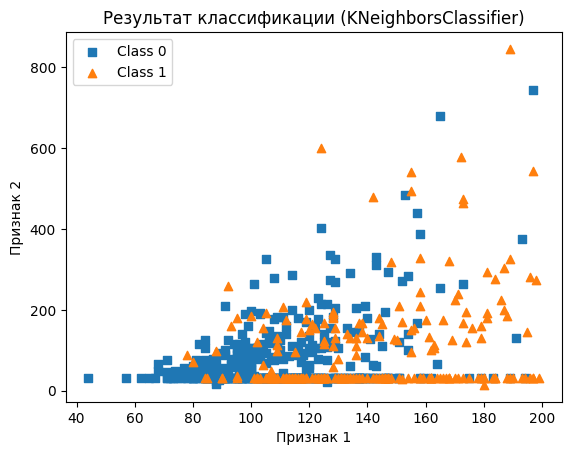

In [51]:
# Построение модели k-Nearest Neighbors (kNN - k-ближайших соседей)
model_knn.set_params(n_neighbors=5)
model_knn.fit(X_train_best_df, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(model_knn.score(X_train_best_df, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(model_knn.score(X_test_best_df, y_test)))
model_report(model_knn, X_train_best_df, y_train)

In [54]:
# Работа с множественной линейной регрессией
# {SkinThickness, BMI} и Y = {Insulin} из датасета

X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

<Axes: xlabel='skinthickness', ylabel='insulin'>

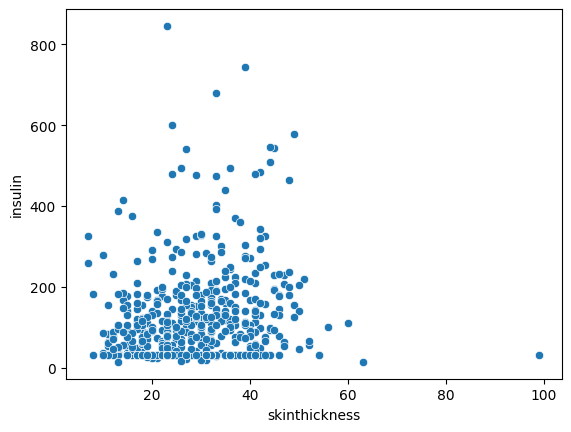

In [55]:
sns.scatterplot(x=dataset['skinthickness'], y=dataset['insulin'])

<Axes: xlabel='bmi', ylabel='insulin'>

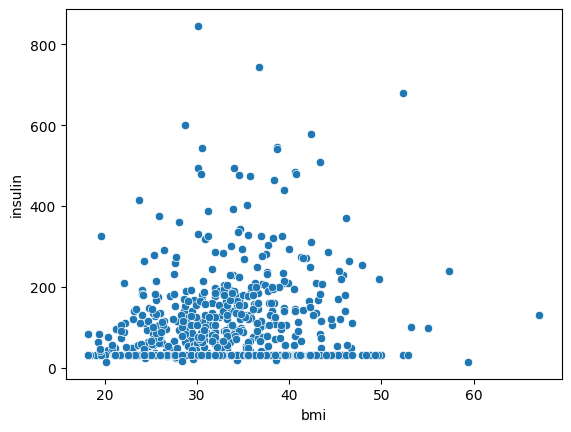

In [56]:
sns.scatterplot(x=dataset['bmi'], y=dataset['insulin'])